<font size=7>STTC Plots

In [1]:
from human_hip import spike_data

In [2]:
import numpy as np                                                    # Packages for data analysis
import matplotlib.pyplot as plt
from human_hip.spike_data.analysis import correlation_matrix, eigenvalues_eigenvectors #firing_rates,

In [3]:
sd = spike_data.read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


In [9]:
# def plot_sttc_matrix( sd, blur=20, sttc_cutoff_high=1.1, plot_color="magma" ):
#     """
#     Outputs: plots the STTC and Correlation matrices for neurons in a recording
#     Input: 
#         sd: spike_data object, the standard data type used by braingeneers 
#         plot_color: string, the color map to use for the plots. Good colors include: "magma", "viridis", "plasma", "inferno"
#     """
#     STTC = sd.spike_time_tilings( blur )  # get the spike time tiling matrix
#     STTC = np.where(STTC<sttc_cutoff_high, STTC, STTC*0)
                      
#     # subplot of STTC 
#     plt.imshow(STTC, cmap=plot_color)       # Show the STTC matrix
#     plt.title("STTC")         # Set the title, x and y labels
#     plt.xlabel("Neuron")
#     plt.ylabel("Neuron")
#     plt.colorbar( shrink=0.3) # Add a colorbar to the plot


In [15]:
def plot_sttc_matrix( sd, blur=20, sttc_cutoff_high=1.1, plot_color="magma" ):
    """
    Outputs: plots the STTC and Correlation matrices for neurons in a recording
    Input: 
        sd: spike_data object, the standard data type used by braingeneers 
        plot_color: string, the color map to use for the plots. Good colors include: "magma", "viridis", "plasma", "inferno"
    """
    STTC = sd.spike_time_tilings( blur )  # get the spike time tiling matrix
    STTC = np.where(STTC<sttc_cutoff_high, STTC, STTC*0)
                      
    # subplot of STTC 
    plt.imshow(STTC, cmap=plot_color)       # Show the STTC matrix
    plt.title("STTC Matrix")         # Set the title, x and y labels
    plt.xlabel("Neuron")
    plt.ylabel("Neuron")
    plt.colorbar( shrink=.8) # Add a colorbar to the plot


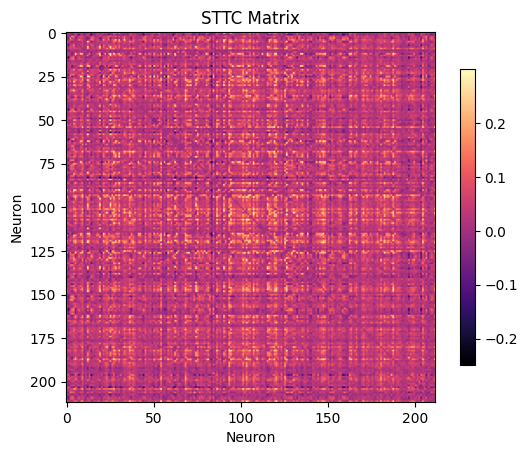

In [16]:
plot_sttc_matrix( sd, sttc_cutoff_high=.3 )

In [27]:
def plot_eigenvectors(sd, n_eigenvectors=5 ):
    corr_matrix = correlation_matrix(sd)
    sttc_matrix = sd.spike_time_tilings()
    corr_eigenvalues, corr_eigenvectors = eigenvalues_eigenvectors(corr_matrix)
    sttc_eigenvalues, sttc_eigenvectors = eigenvalues_eigenvectors(sttc_matrix)
    
    #fig, axs = plt.subplots(5, 2, figsize=(12,8)) #,  )

    for i in range(n_eigenvectors):
        #if i: plt.xticks([])
        axs[i,0].stem(sttc_eigenvectors[:,i])
        axs[i,1].stem(corr_eigenvectors[:,i])
        axs[i,0].set(ylabel= f"{i+1}")
        
        ylim_min = np.min([sttc_eigenvectors[:,i], corr_eigenvectors[:,i]]) -.1
        ylim_max = np.max([sttc_eigenvectors[:,i], corr_eigenvectors[:,i]]) +.1
        axs[i,0].set_ylim(ylim_min, ylim_max)
        axs[i,1].set_ylim(ylim_min, ylim_max)

    #for ax in fig.get_axes():
    #    ax.label_outer()
    axs[0, 0].set_title("STTC")
    axs[0, 1].set_title("Correlation")


array([16.63990506,  6.82032324,  5.16028767,  2.6155874 ,  2.1570714 ,
        1.92562219,  1.78602751,  1.6511931 ,  1.6005417 ,  1.53026487,
        1.49774516,  1.46832659,  1.44089698,  1.38909527,  1.35760041,
        1.35490171,  1.33371566,  1.32738666,  1.32153823,  1.31344542,
        1.30572773,  1.30259382,  1.2855035 ,  1.2754071 ,  1.27344397,
        1.24963716,  1.2375756 ,  1.23373279,  1.2277488 ,  1.22439289,
        1.21197276,  1.20496581,  1.19950213,  1.18922627,  1.17930719,
        1.17817209,  1.16743122,  1.15619609,  1.15492937,  1.1476947 ,
        1.13942287,  1.13753921,  1.13386158,  1.12901025,  1.12104525,
        1.11566359,  1.10885075,  1.09992323,  1.09778106,  1.09217595,
        1.0897096 ,  1.08595864,  1.07894456,  1.07348271,  1.07061195,
        1.06978347,  1.0637552 ,  1.05623874,  1.05356057,  1.05016057,
        1.04617778,  1.04219601,  1.04069003,  1.03705523,  1.0336125 ,
        1.02312189,  1.022305  ,  1.01701652,  1.01403509,  1.00

ValueError: could not broadcast input array from shape (44944,) into shape (212,)

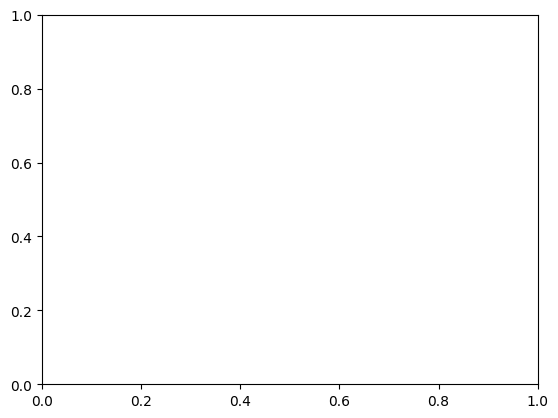

In [26]:
sttc_matrix = sd.spike_time_tilings()
sttc_eigenvectors = eigenvalues_eigenvectors(sttc_matrix)
plt.stem(sttc_eigenvectors[1])